# THE DEFINITIVE DIAMOND BUYING GUIDE

Thanks to this guide you don't need to be an expert gemologist to buy at the best price your dreamed diamond. Also, this guide will be useful for those thinking to sell its diamonds for fair price. 

***Data Description***

*Here's the things you need to know before to start exploring the dataset.*


**CARAT:**
Today, a carat is equal to exactly 0.2 grams (about the weight of a paper clip)

**CUT:**

**COLOR:**
The diamond color evaluation of most gem-quality diamonds is based on the absence of color. A chemically pure and structurally perfect diamond has no hue, like a drop of pure water, and consequently, a higher value. 
Buying Tip:

For the best value in what would appear to the naked eye as a colorless diamond, look for G-J diamonds. Opt for G-H in diamonds over 1 carat, and I-J for those under 1 carat.  Instead of investing in higher color, invest in higher cut, the most important factor in a diamond's brilliance

**CLARITY:**
While no diamond is perfectly pure, the closer it comes, the higher its value.
Flawless (FL) No inclusions and no blemishes visible under 10x magnification
Internally Flawless (IF) No inclusions visible under 10x magnification
Very, Very Slightly Included (VVS1 and VVS2) Inclusions so slight they are difficult for a skilled grader to see under 10x magnification
Very Slightly Included (VS1 and VS2) Inclusions are observed with effort under 10x magnification, but can be characterized as minor
Slightly Included (SI1 and SI2) Inclusions are noticeable under 10x magnification
Included (I1, I2, and I3) Inclusions are obvious under 10x magnification which may affect transparency and brilliance

--

x = lenght in mm
y = width in mm
z = depth in mm

price in US$

*Research websites:* 
- https://www.lumeradiamonds.com/
- https://4cs.gia.edu

**Needed Libraries:**

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the data:**

In [236]:
diamonds = pd.read_csv('/home/juan/IronHack/ih_datamadpt0420_project_m2/Data/diamonds_train.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


**Info about the data**

In [237]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


**Let's check if there is any null value**

In [238]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Let's find the most important statistical measures through the describe method**

In [239]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


**Also, we can describe the object functions**

In [240]:
diamonds.describe(include=['object'])

,cut,color,clarity
count,40455,40455,40455
unique,5,7,8
top,Ideal,G,SI1
freq,16220,8455,9749


**We discovered some zero values for the lenght, width and depth, let see how they are and drop them from the dataframe**

In [241]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
1606,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
3945,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
13839,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.0
14815,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
14891,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
16425,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
19856,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
21602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
24795,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0


In [242]:
len(diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])

16

In [243]:
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]

In [244]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


**Instead of do the analysis of three distinct variables, we will add a new column with *VOLUME* of the diamond --> lenght * width * depth**

In [249]:
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']

In [250]:
diamonds['$/C'] = diamonds['price']/diamonds['carat']**2

KeyboardInterrupt: 

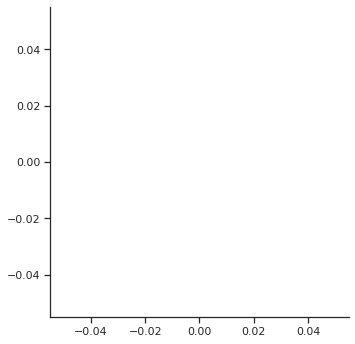

In [264]:
sns.relplot(y="carat", x="price", kind="line", data=diamonds)

In [252]:
diamonds.drop(['x','y','z'], axis=1, inplace= True)

**Before continue we are going to add two more columns**
- Color group
- Clarity group

Like we have done with the volume, this will help us to simplify the analysis

In [253]:
color_dict = {'D':'Colorless','E':'Colorless','F':'Colorless',
              'G':'Near Colorless','H':'Near Colorless','I':'Near Colorless','J':'Near Colorless', 
             'K':'Faint', 'L':'Faint', 'M':'Faint', 
             'N':'Very Light', 'O':'Very Light', 'P':'Very Light', 'Q':'Very Light', 'R':'Very Light',
              'S':'Light', 'T':'Light', 'U':'Light', 'V':'Light', 'W':'Light', 'X':'Light', 'Y':'Light', 'Z':'Light'}

clarity_dict = {'FL':'Flawless',
                'IF':'Internally Flawless',
                'VVS1':'Very Very Slightly Included','VVS2':'Very Very Slightly Included',
                'VS1':'Very Slightly Included', 'VS2':'Very Slightly Included',
                'SI1':'Slightly Included', 'SI2':'Slightly Included',
                'I1':'Included', 'I2':'Included','I3':'Included'}

In [254]:
diamonds['color_grp'] = diamonds['color'].map(color_dict)
diamonds['clarity_grp'] = diamonds['clarity'].map(clarity_dict)

In [255]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume,$/C,color_grp,clarity_grp
0,1.21,Premium,J,VS2,62.4,58.0,4268,197.096725,2915.101427,Near Colorless,Very Slightly Included
1,0.32,Very Good,H,VS2,63.0,57.0,505,52.395750,4931.640625,Near Colorless,Very Slightly Included
2,0.71,Fair,G,VS1,65.5,55.0,2686,113.436890,5328.307875,Near Colorless,Very Slightly Included
3,0.41,Good,D,SI1,63.8,56.0,738,66.268800,4390.243902,Colorless,Slightly Included
4,1.02,Ideal,G,SI1,60.5,59.0,4882,168.429975,4692.425990,Near Colorless,Slightly Included


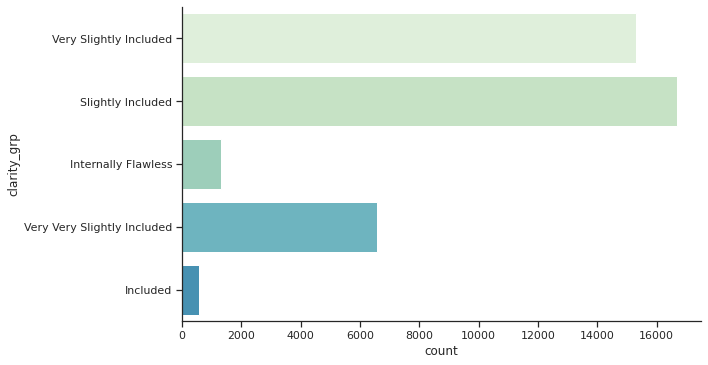

In [256]:
sns.set(style="ticks", palette='GnBu')
#info about the pallete https://loading.io/color/feature/GnBu-8/

sns.catplot(y='clarity_grp', data=diamonds, kind='count' ,aspect=2);

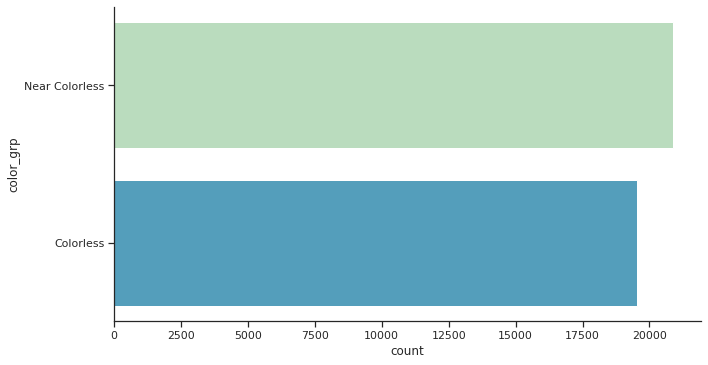

In [257]:
sns.catplot(y='color_grp', data=diamonds, kind='count',aspect=2, palette='GnBu');

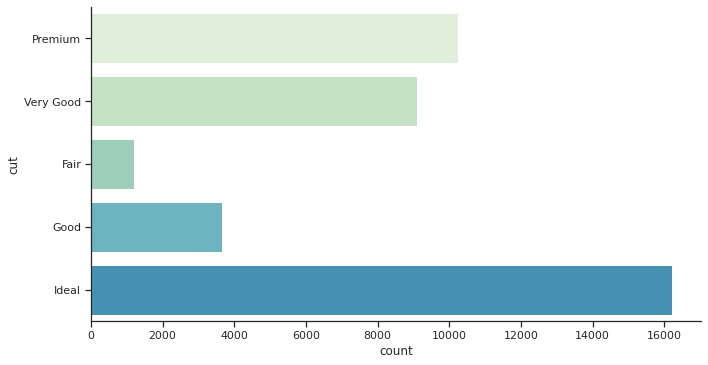

In [258]:
sns.catplot(y='cut', data=diamonds, kind='count' ,aspect=2);

**Let's do trh Correlation Matrix to gather more info about diamonds and its price**

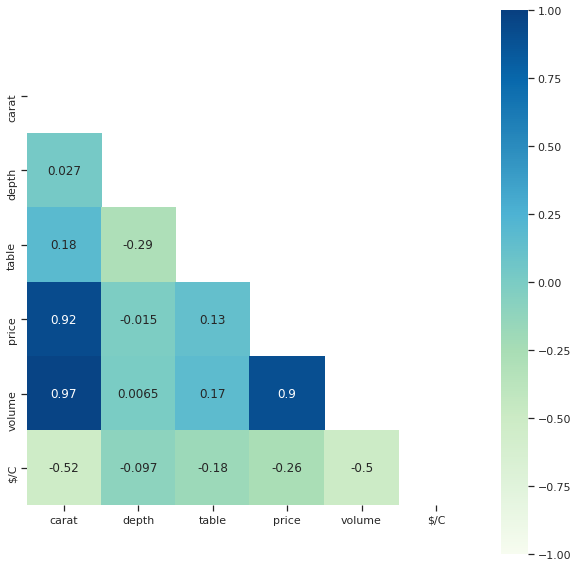

In [259]:
fig, ax = plt.subplots(figsize=(10,10))

matrix = np.triu(diamonds.corr())
sns.heatmap(diamonds.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'GnBu',square=True,  ax=ax);

**Two important conclusions here:**
- As the carat increases, the price increases
- Strong correlation between carat and volume due to as mentioned above the carat is a unit of 'size'

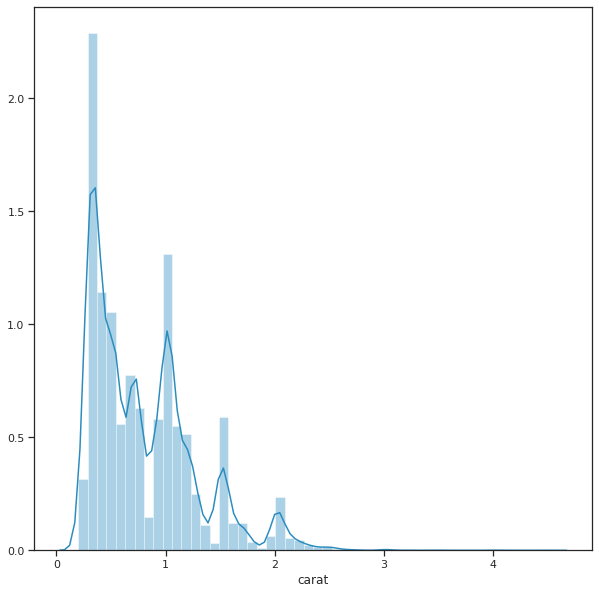

In [119]:
fig, ax = plt.subplots(figsize=(10,10))

sns.distplot(diamonds['carat'], color='#2b8cbe');

**Above the histogram of carat that show us that as larger the diamond is, the more increasingly rare it is, that's why its price increases**

Let's see in a closer way the relation between price and carat

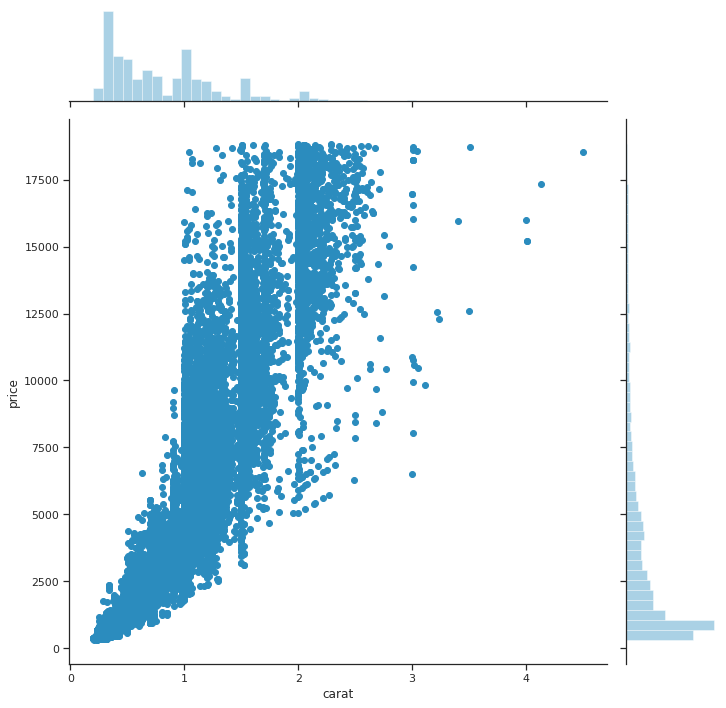

In [261]:
sns.jointplot(x='carat', y='price' , data=diamonds, height=10,color='#2b8cbe');

It's interesting to observe how the diamonds could be classified in carat bins, let's do it!

In [171]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

diamonds['carat_bnd'] = pd.cut(diamonds['carat'], bins, labels=range(1,10))

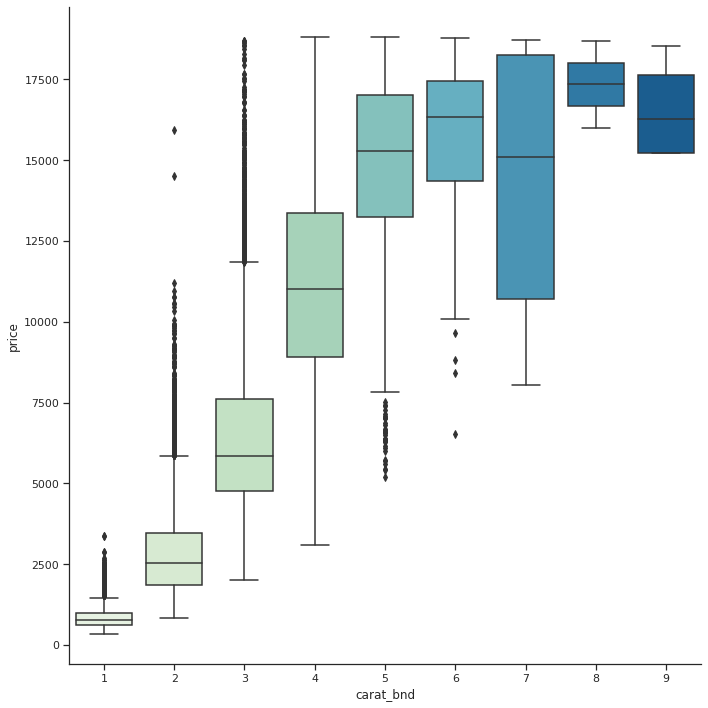

In [173]:
sns.catplot(x='carat_bnd', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

We discovered that the most important thing is the carat, however, let's discover what does a small-carat diamond be expensive. 

In [234]:
diamonds['carat_bnd'].value_counts(normalize=True)

1.0    0.392668
2.0    0.358570
3.0    0.248762
Name: carat_bnd, dtype: float64

In [188]:
diamonds['carat_bnd'] = diamonds['carat_bnd'].apply(lambda x:x if x < 4 else None)
diamonds_small_carat = diamonds.dropna(subset=['carat_bnd'])
diamonds_small_carat.describe()

In [232]:
columns_to_show = ['price', 'carat']
diamonds_small_carat.groupby(['cut'])[columns_to_show].agg([np.count_nonzero, np.mean, np.std, np.min, np.max])

price                                               carat  \
          count_nonzero         mean          std amin   amax count_nonzero   
cut                                                                           
Fair               1015  3181.974384  1924.764603  337  16364        1015.0   
Good               3301  3009.418358  2345.686799  327  17449        3301.0   
Ideal             15065  2706.809824  2681.221115  326  18700       15065.0   
Premium            8743  3221.956651  2714.561267  326  18279        8743.0   
Very Good          8212  3060.803702  2673.182453  337  18691        8212.0   

                                          
               mean       std  amin amax  
cut                                       
Fair       0.866424  0.275431  0.22  1.5  
Good       0.738549  0.321594  0.23  1.5  
Ideal      0.618202  0.316531  0.20  1.5  
Premium    0.734959  0.352209  0.20  1.5  
Very Good  0.702098  0.333824  0.21  1.5

In [233]:
diamonds_small_carat.groupby(['clarity_grp'])[columns_to_show].agg([np.count_nonzero, np.mean,np.median, np.std, np.min, np.max])

price                                   \
                            count_nonzero         mean median          std   
clarity_grp                                                                  
Included                              406  2663.977833   2702  1300.350246   
Internally Flawless                  1303  2589.605526   1064  3523.745051   
Slightly Included                   14225  3074.950861   2830  2067.496080   
Very Slightly Included              13986  2985.348134   1791  2796.731085   
Very Very Slightly Included          6416  2695.867363   1143  3234.435339   

                                                carat                   \
                            amin   amax count_nonzero      mean median   
clarity_grp                                                              
Included                     361   6096         406.0  0.991552   1.01   
Internally Flawless          369  18700        1303.0  0.479493   0.35   
Slightly Included            326  13445       14225.0  0.788995   0.79   
Very Slightly Included       327  18691       13986.0  0.655465   0.54   
Very Very Slightly Included  354  18682        6416.0  0.530524   0.41   

                                                  
                                  std  amin amax  
clarity_grp                                       
Included                     0.287242  0.30  1.5  
Internally Flawless          0.270752  0.23  1.5  
Slightly Included            0.317169  0.20  1.5  
Very Slightly Included       0.329764  0.20  1.5  
Very Very Slightly Included  0.297679  0.23  1.5

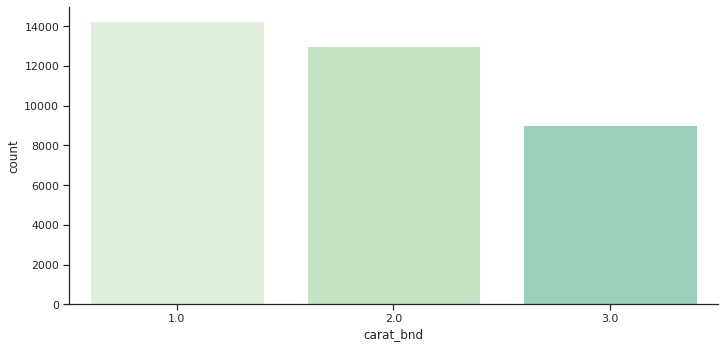

In [200]:
sns.catplot(x='carat_bnd', data=diamonds_small_carat, kind='count' ,aspect=2);

KeyboardInterrupt: 

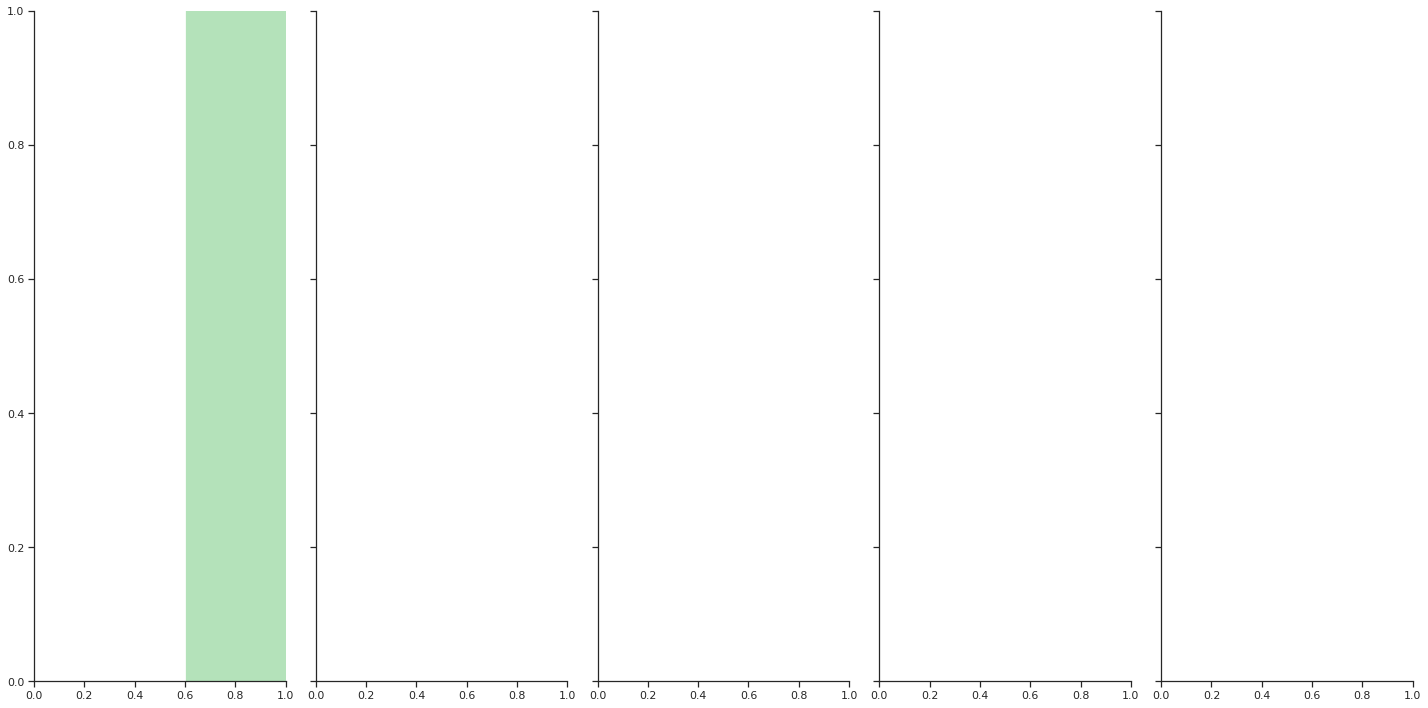

In [197]:
g = sns.FacetGrid(diamonds, col="cut", hue='color_grp', palette='GnBu', aspect=0.4, height=10)
g.map(plt.bar,  'carat_bnd',"price", alpha=.7);

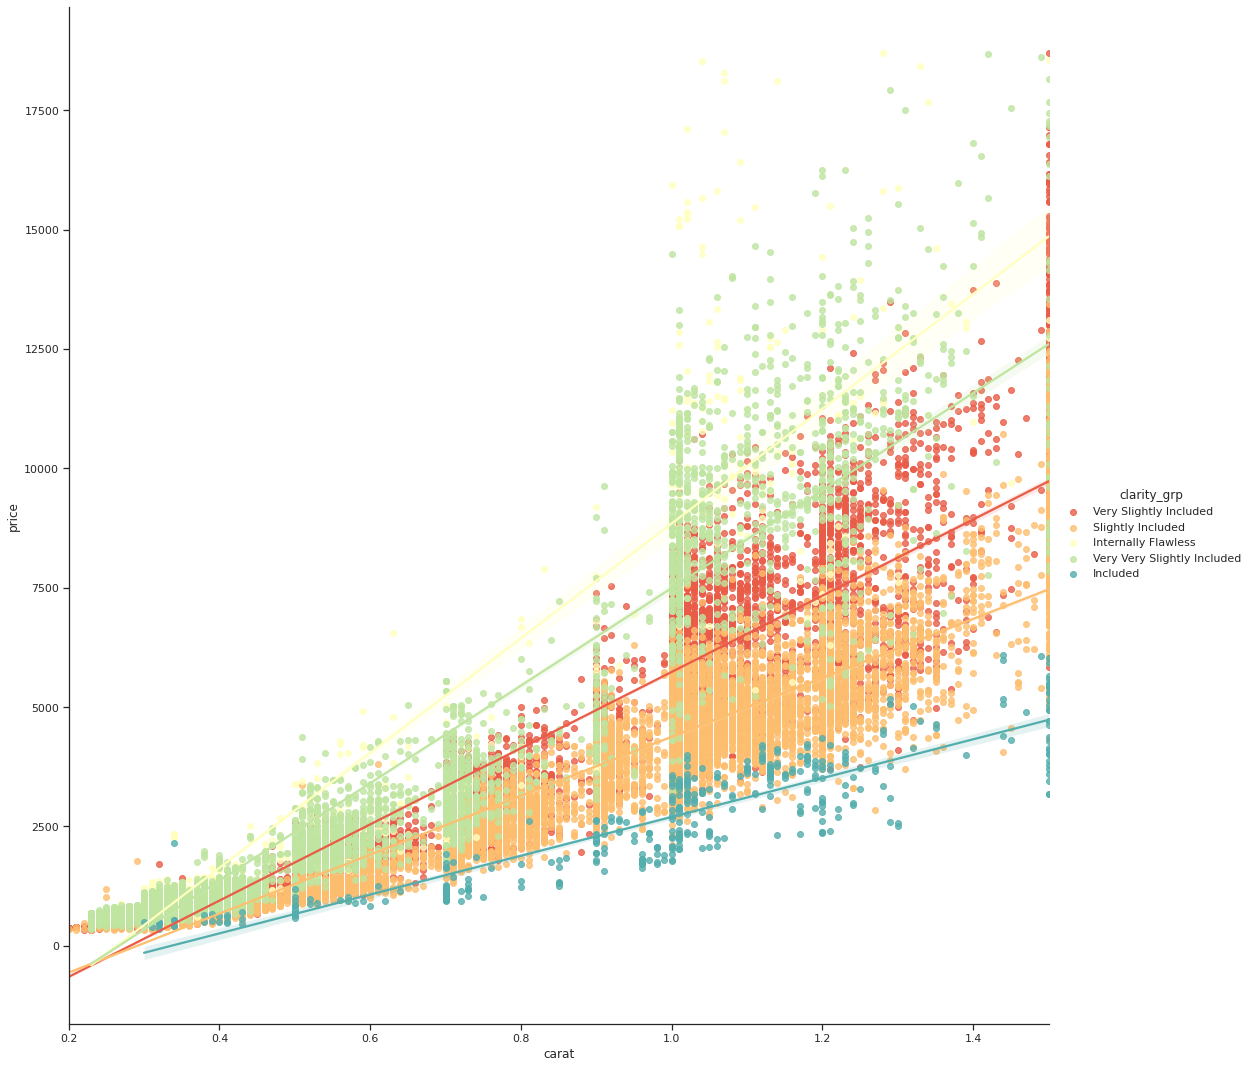

In [220]:
sns.lmplot(x='carat', y='price', data=diamonds_small_carat,
           #fit_reg=False, # No regression line
           hue='clarity_grp',
          height=15, palette='Spectral')   # Color by evolution stage

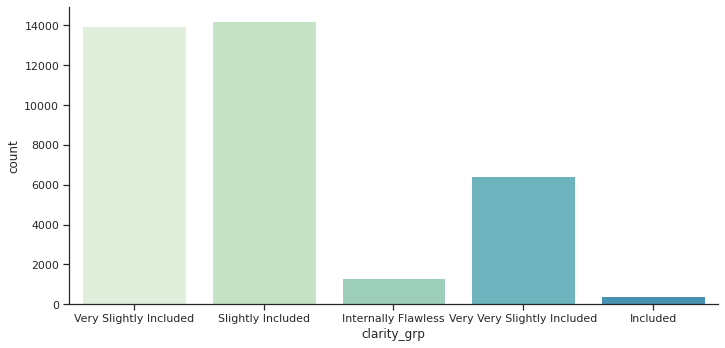

In [217]:
sns.catplot(x='clarity_grp', data=diamonds_small_carat, kind='count' ,aspect=2);

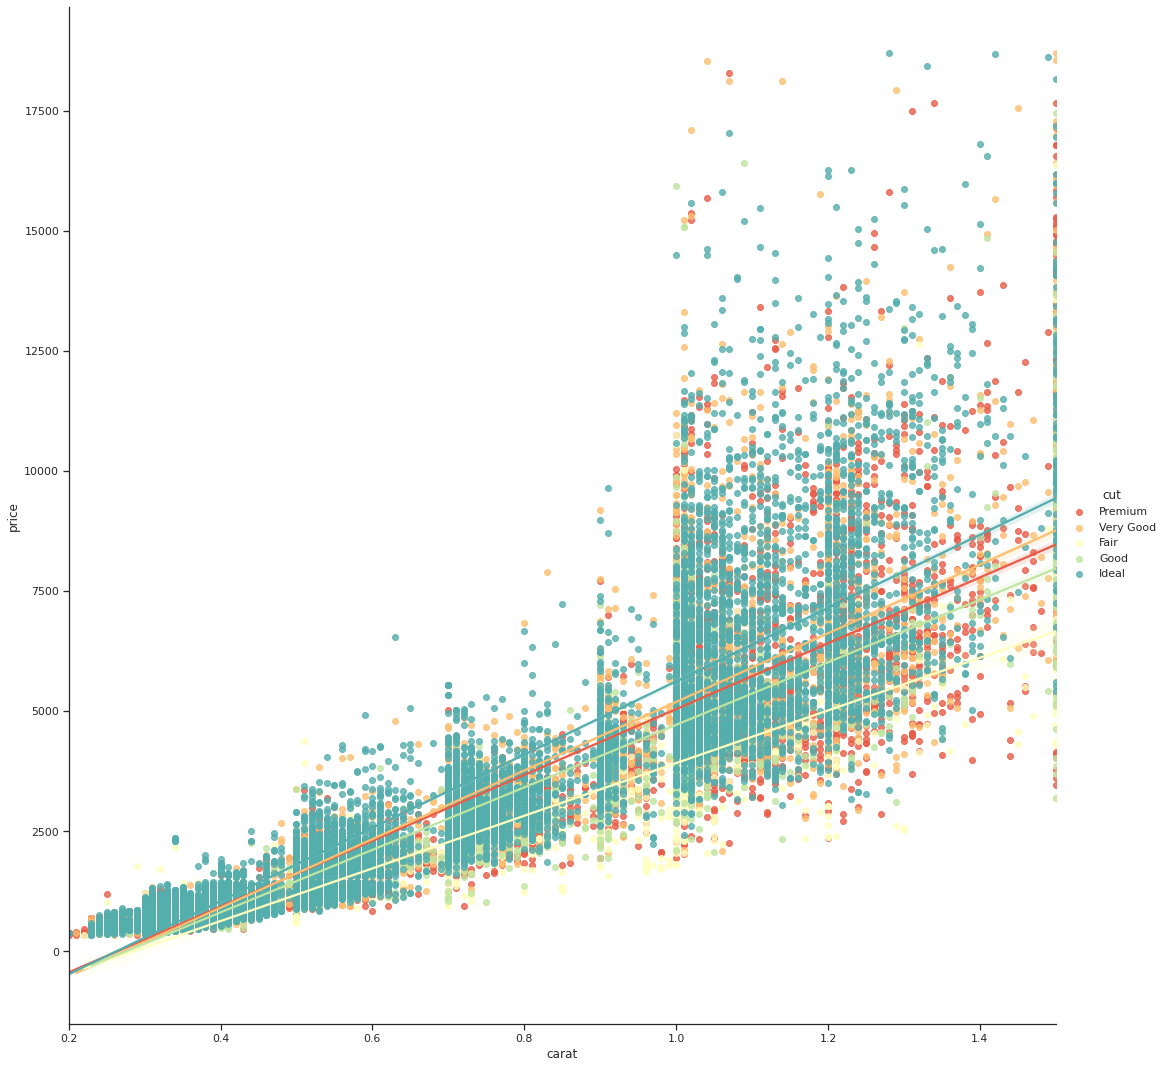

In [222]:
sns.lmplot(x='carat', y='price', data=diamonds_small_carat,
           #fit_reg=False, # No regression line
           hue='cut',
          height=15, palette='Spectral')   # Color by evolution stage

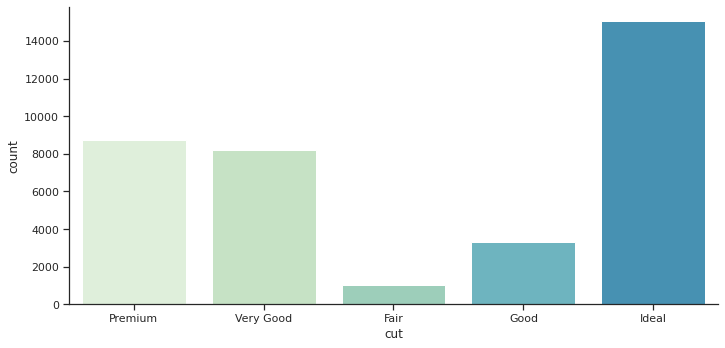

In [224]:
sns.catplot(x='cut', data=diamonds_small_carat, kind='count' ,aspect=2);

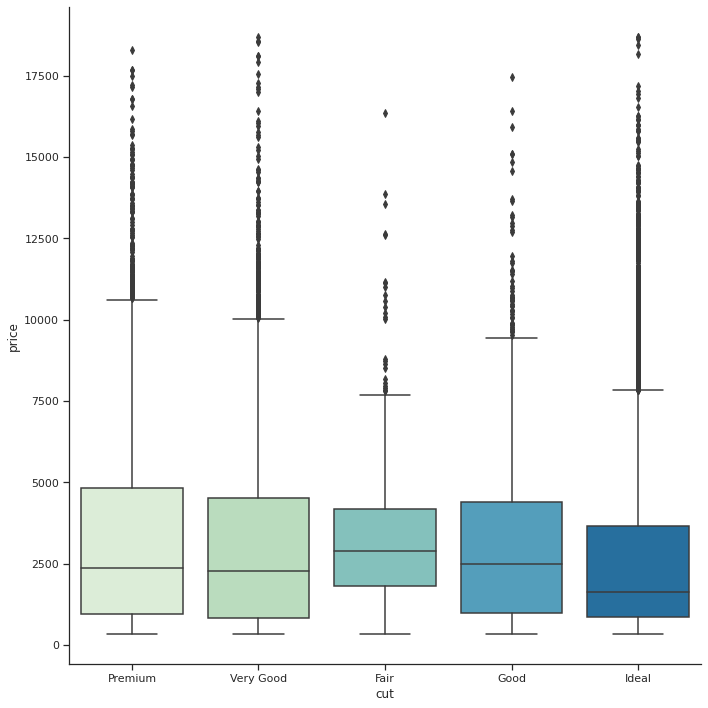

In [225]:
sns.catplot(x='cut', y='price', kind='box', data=diamonds_small_carat, height=10, palette='GnBu');

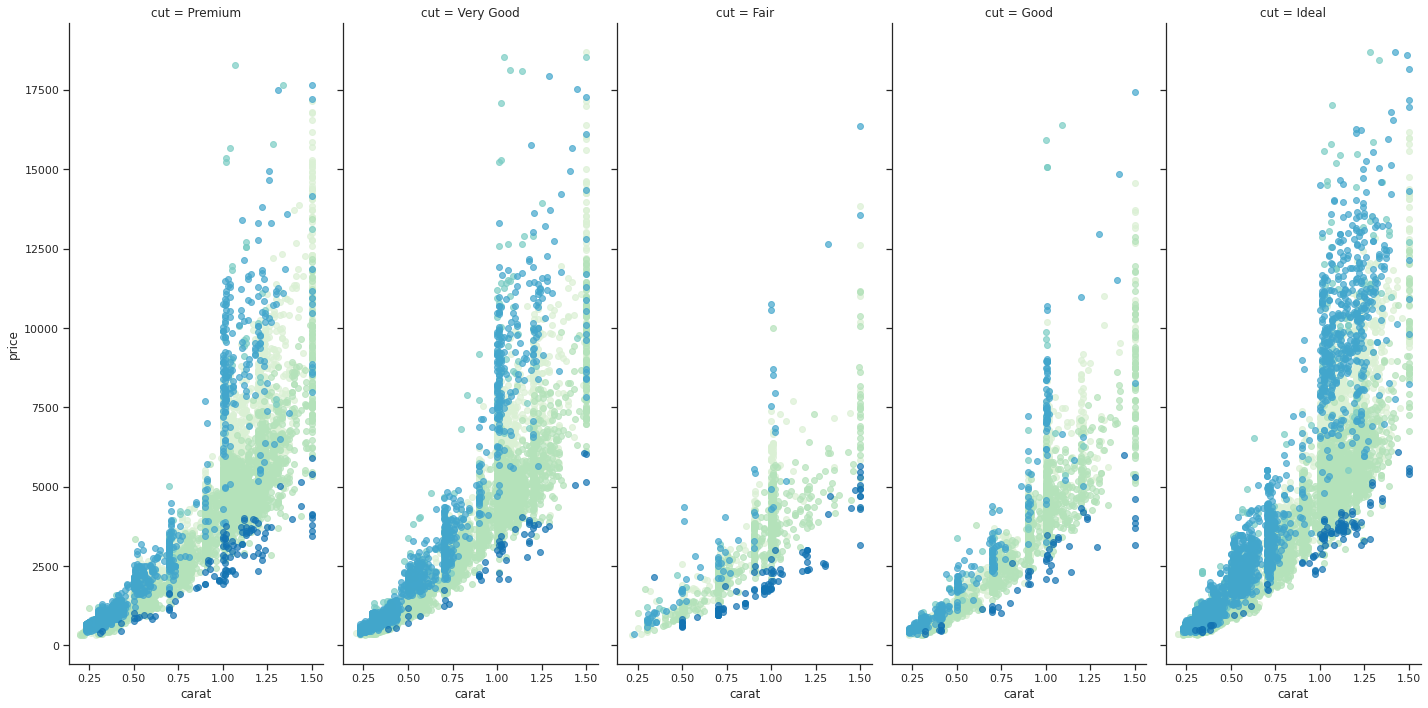

In [198]:
g = sns.FacetGrid(diamonds_small_carat, col="cut", hue='clarity_grp', palette='GnBu', aspect=0.4, height=10)
g.map(plt.scatter,  'carat',"price", alpha=.7);

In [23]:
diamonds['cut'].value_counts(normalize=True)

Ideal        0.400939
Premium      0.253615
Very Good    0.224818
Good         0.090545
Fair         0.030083
Name: cut, dtype: float64

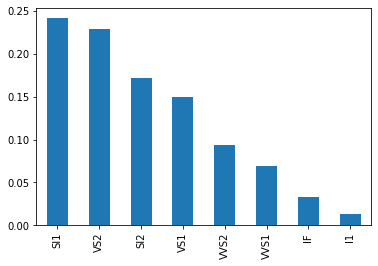

In [105]:
s = diamonds['clarity'].value_counts(normalize=True)
s.plot(kind='bar')

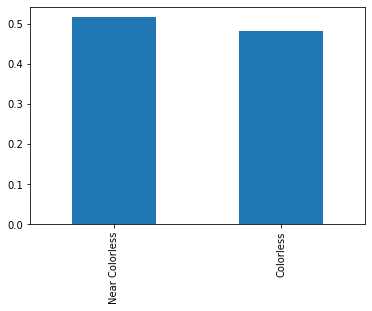

In [108]:
s = diamonds['iod'].value_counts(normalize=True)
s.plot(kind='bar')

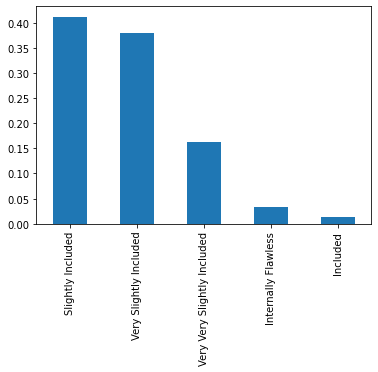

In [109]:
s = diamonds['pop'].value_counts(normalize=True)
s.plot(kind='bar')

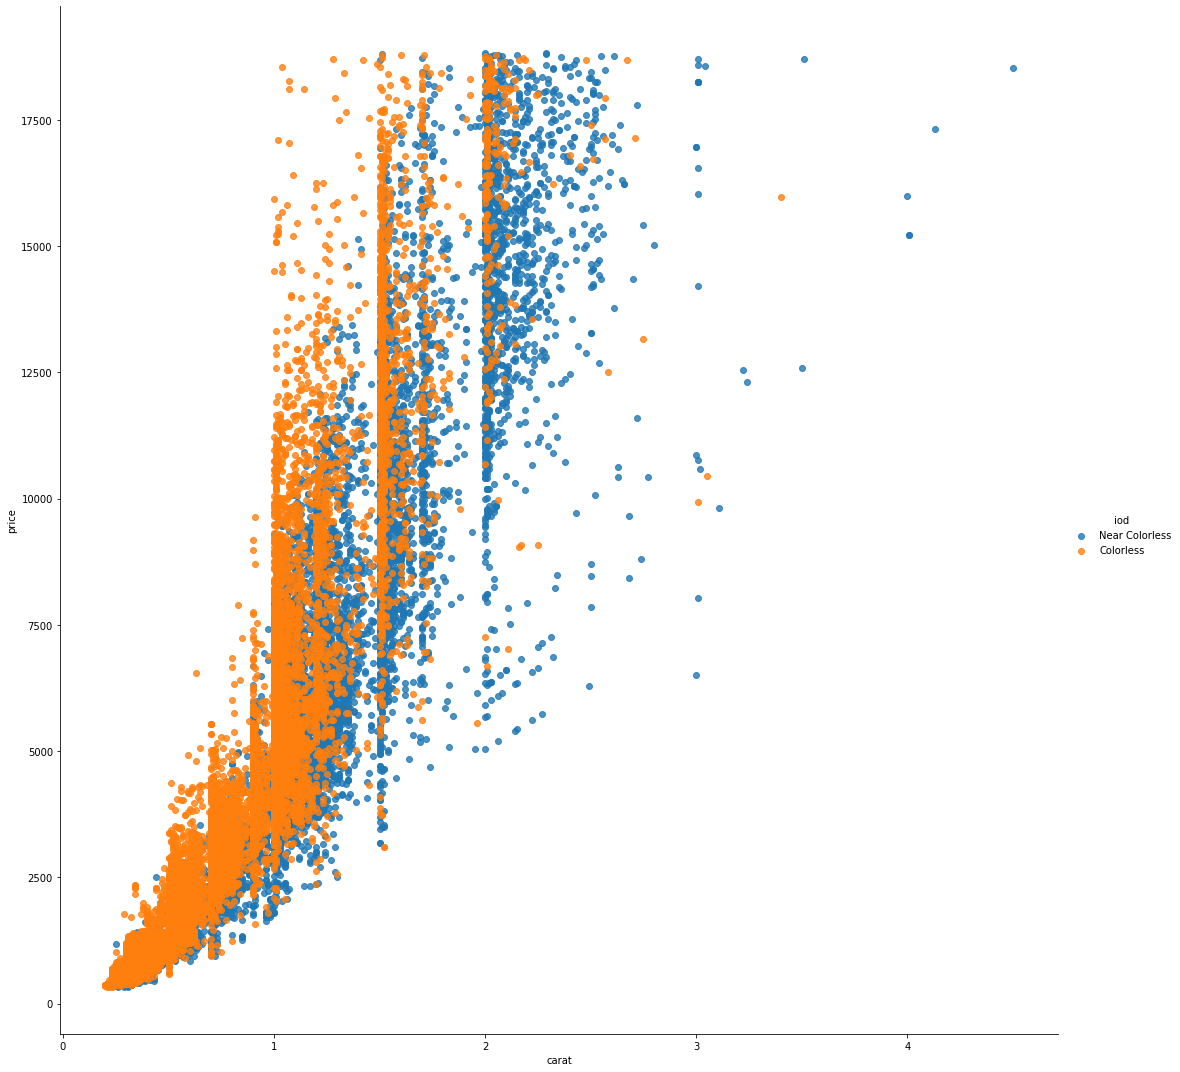

In [96]:
sns.lmplot(x='carat', y='price', data=diamonds,
           fit_reg=False, # No regression line
           hue='iod',
          height=15)   # Color by evolution stage

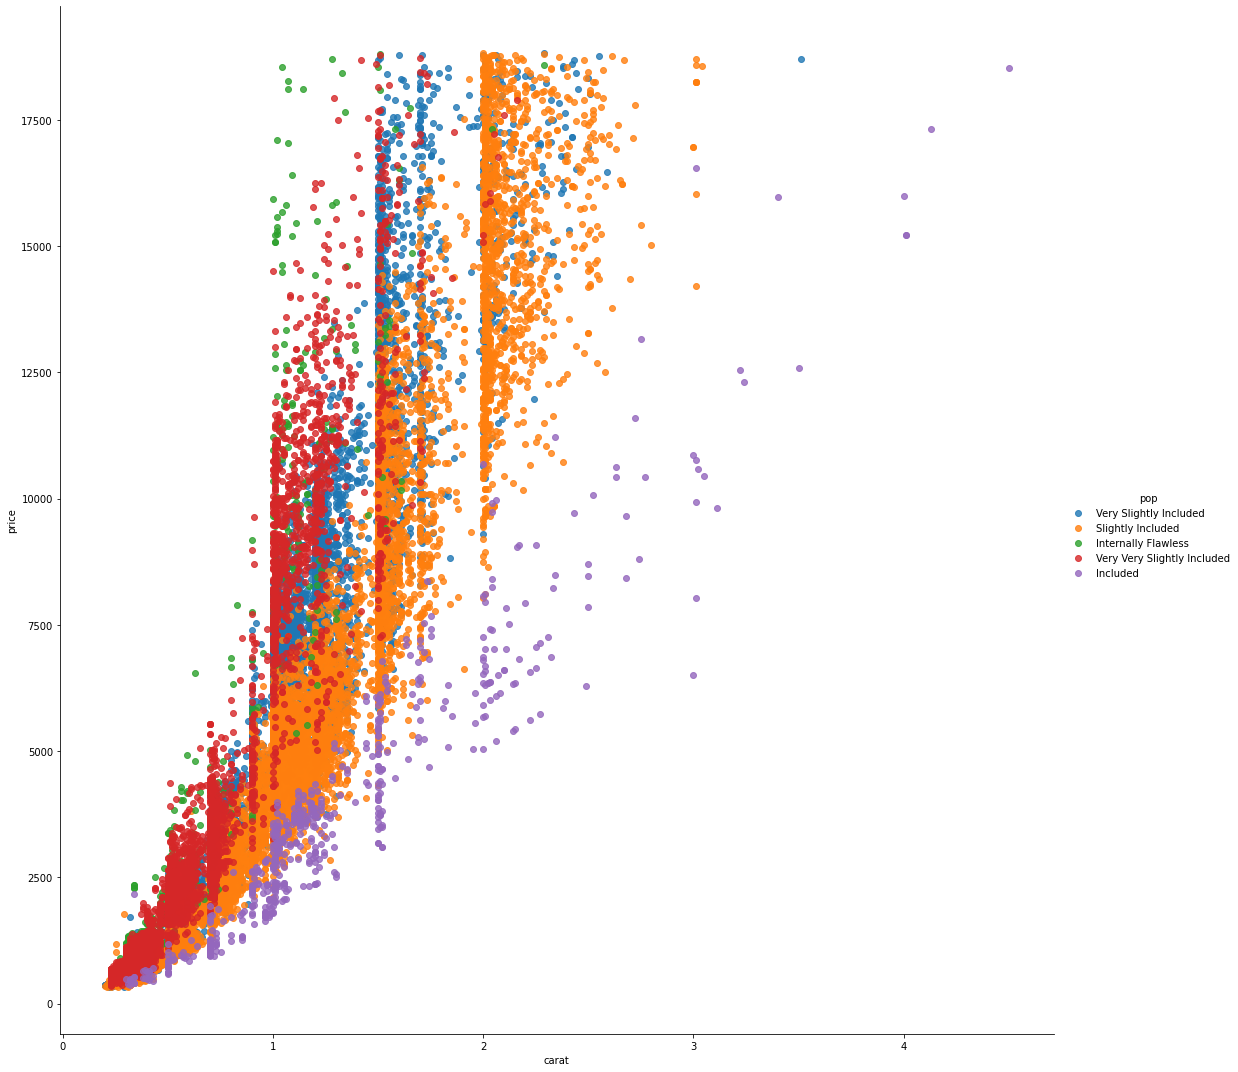

In [100]:
sns.lmplot(x='carat', y='price', data=diamonds,
           fit_reg=False, # No regression line
           hue='pop',
          height=15)   # Color by evolution stage

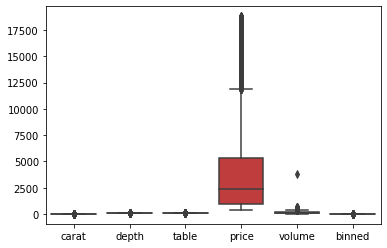

In [50]:
sns.boxplot(data=diamonds)

In [49]:
diamonds['color'].value_counts(normalize=True)

G    0.208998
E    0.181065
F    0.177407
H    0.155160
D    0.124805
I    0.099666
J    0.052898
Name: color, dtype: float64

In [45]:
columns_to_show = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price']

diamonds.groupby(['cut'])[columns_to_show].agg([np.count_nonzero, np.mean, np.std, np.min, np.max])

carat                                         depth  \
          count_nonzero      mean       std  amin  amax count_nonzero   
cut                                                                     
Fair             1217.0  1.047305  0.509948  0.22  4.50        1217.0   
Good             3663.0  0.844565  0.453429  0.23  3.01        3663.0   
Ideal           16220.0  0.700337  0.432435  0.20  3.50       16220.0   
Premium         10260.0  0.896125  0.519845  0.20  4.01       10260.0   
Very Good        9095.0  0.808056  0.461388  0.21  4.00        9095.0   

                                                   table                       \
                mean       std  amin  amax count_nonzero       mean       std   
cut                                                                             
Fair       64.051438  3.634651  43.0  79.0        1217.0  59.022104  4.000703   
Good       62.407699  2.136913  54.3  66.2        3663.0  58.652307  2.861420   
Ideal      61.703206  0.726100  43.0  65.5       16220.0  55.952990  1.249847   
Premium    61.261082  1.156444  58.0  63.0       10260.0  58.737076  1.470112   
Very Good  61.824794  1.379166  56.8  64.9        9095.0  57.956031  2.120221   

                              price                                        
           amin  amax count_nonzero         mean          std amin   amax  
cut                                                                        
Fair       49.0  95.0          1217  4333.271980  3496.467642  337  18574  
Good       51.0  66.0          3663  3880.611794  3647.039840  327  18788  
Ideal      43.0  63.0         16220  3436.112577  3790.911135  326  18806  
Premium    51.0  62.0         10260  4617.322612  4380.357286  326  18823  
Very Good  44.0  65.0          9095  3994.444420  3955.185677  337  18818

In [40]:
diamonds.groupby(['color'])[columns_to_show].agg([np.count_nonzero, np.mean, np.std, np.min, np.max])

carat                                         depth             \
      count_nonzero      mean       std  amin  amax count_nonzero       mean   
color                                                                          
D            5049.0  0.653036  0.356574  0.20  3.40        5049.0  61.721886   
E            7325.0  0.658835  0.368947  0.20  3.05        7325.0  61.659836   
F            7177.0  0.731503  0.396620  0.22  3.01        7177.0  61.689954   
G            8455.0  0.774382  0.445365  0.23  3.01        8455.0  61.752785   
H            6277.0  0.910355  0.520077  0.23  4.13        6277.0  61.827481   
I            4032.0  1.026791  0.585888  0.23  4.01        4032.0  61.873214   
J            2140.0  1.166500  0.595036  0.23  4.50        2140.0  61.909626   

                                    table                                   \
            std  amin  amax count_nonzero       mean       std  amin  amax   
color                                                                        
D      1.399186  54.2  71.6        5049.0  57.344959  2.197308  52.0  73.0   
E      1.417519  53.3  79.0        7325.0  57.494567  2.235462  44.0  73.0   
F      1.435791  52.3  71.0        7177.0  57.409726  2.264785  50.0  95.0   
G      1.378864  43.0  72.9        8455.0  57.287889  2.133175  52.0  76.0   
H      1.457913  52.7  71.8        6277.0  57.533503  2.258280  50.0  73.0   
I      1.463883  55.3  71.3        4032.0  57.562574  2.318366  43.0  70.0   
J      1.564846  43.0  73.6        2140.0  57.790701  2.292664  52.0  68.0   

              price                                        
      count_nonzero         mean          std amin   amax  
color                                                      
D              5049  3134.943157  3315.698012  357  18693  
E              7325  3088.342526  3354.545963  326  18731  
F              7177  3677.355720  3771.406126  342  18791  
G              8455  4023.214902  4063.947046  354  18818  
H              6277  4476.469014  4204.035086  337  18795  
I              4032  5090.868800  4768.111546  334  18823  
J              2140  5346.234112  4437.967123  335  18710

In [42]:
diamonds.groupby(['clarity'])[columns_to_show].agg([np.count_nonzero, np.mean, np.std, np.min, np.max])

carat                                         depth  \
        count_nonzero      mean       std  amin  amax count_nonzero   
clarity                                                               
I1              563.0  1.299591  0.635517  0.30  4.50         563.0   
IF             1327.0  0.499849  0.308331  0.23  2.29        1327.0   
SI1            9749.0  0.851174  0.451775  0.21  2.57        9749.0   
SI2            6929.0  1.081472  0.518151  0.20  3.04        6929.0   
VS1            6066.0  0.721553  0.423131  0.23  2.59        6066.0   
VS2            9248.0  0.762661  0.445866  0.20  3.51        9248.0   
VVS1           2774.0  0.506994  0.300918  0.23  2.16        2774.0   
VVS2           3799.0  0.591777  0.356620  0.23  2.07        3799.0   

                                                 table                       \
              mean       std  amin  amax count_nonzero       mean       std   
clarity                                                                       
I1       62.804796  2.815905  55.6  73.6         563.0  58.237478  2.569192   
IF       61.511454  1.039907  52.3  65.6        1327.0  56.496684  1.964524   
SI1      61.859668  1.473593  43.0  72.9        9749.0  57.648549  2.255042   
SI2      61.779954  1.686469  53.3  72.2        6929.0  57.909150  2.317129   
VS1      61.678948  1.292220  55.3  71.8        6066.0  57.285410  2.222605   
VS2      61.721345  1.349678  43.0  79.0        9248.0  57.404520  2.164225   
VVS1     61.606921  1.083490  54.0  66.1        2774.0  56.929740  2.050183   
VVS2     61.658884  1.145401  54.2  67.0        3799.0  57.031561  2.071003   

                            price                                        
         amin  amax count_nonzero         mean          std amin   amax  
clarity                                                                  
I1       52.0  67.0           563  3971.206039  2804.710106  361  18531  
IF       52.8  65.0          1327  2797.897513  3834.632644  369  18806  
SI1      49.0  95.0          9749  3999.856908  3821.246565  326  18818  
SI2      50.1  79.0          6929  5101.044307  4288.071076  326  18791  
VS1      43.0  73.0          6066  3796.813551  4001.986722  327  18795  
VS2      51.0  73.0          9248  3913.590182  4029.640798  334  18823  
VVS1     52.0  68.0          2774  2559.498558  3333.512733  395  18777  
VVS2     52.0  68.0          3799  3240.978942  3794.536518  354  18718